# Natural Language Processing with Python 

**NLTK - Natural Language Toolkit**

There is a free book _Natural Language Processing with Python
--- Analyzing Text with the Natural Language Toolkit_

by Steven Bird, Ewan Klein, and Edward Loper

availible at [http://www.nltk.org/book](http://www.nltk.org/book) with associated code at [https://github.com/nltk](https://github.com/nltk).



In [1]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import nltk

Open up the python shell and type the following commands.

> import nltk     
> nltk.download()    

This will open up a window so NLTK download the various corpora and models to a specified location. Download it all as we will be exploring as much of NLTK as we can. Also take note of the download directory.  I usually use /Users/bear/nltk_data

In [2]:
import spacy
import gensim

To install these packages with conda run:

conda install -c spacy spacy=0.101.0

conda install -c anaconda gensim=1.0.1

In [3]:
seuss = ["You have brains in your head.",
           "You have feet in your shoes.", 
           "You can steer yourself any direction you choose.",            
           "You're on your own.", 
           "And you know what you know.", 
           "And YOU are the one who'll decide where to go...",    
           "Today you are you, that is truer than true. There is no one alive who is youer than you. - Dr. Seuss",
           "Don't cry because it's over. Smile because it happened. - Dr. Seuss",       
           "Unless someone like you cares a whole awful lot, nothing is going to get better. It's not. - Dr. Seuss",
           "A person's a person, no matter how small. - Dr. Seuss",       
           "Today is your day! Your mountain is waiting so get on your way! - Dr. Seuss", 
           "You're never too old, too wacky, too wild, to pick up a book and read to a child. - Dr. Seuss",
           "The more that you read, the more things you will know. The more that you learn, the more places you'll go. - Dr. Seuss",
           "Oh the things you can find if you don't stay behind! - Dr. Seuss",
           "And turtles, of course. all the turtles are FREE. As turtles and, maybe, ALL creatures should be. - Dr. Seuss",
           "With your head full of brains and your shoes full of feet, you're too smart to go down any not-so-good street. - Dr. Seuss",
           "You're on your own. And you know what you know. And you're the one who'll decide where to go. - Dr. Seuss", 
           "Sometimes the questions are complicated and the answers are simple. - Dr. Seuss",
           "You do not like them. So you say. Try them! Try them! And you may! - Dr. Seuss",
           "You have brains in your head, you have feet in your shoes. You can steer yourself any direction you choose. - Dr. Seuss",
           "If things start happening, don't worry. Don't stew. Just go right along. You'll start happening too. - Dr. Seuss", 
           "So be sure when you step. Step with care and great tact and remember that life's a Great Balancing Act. - Dr. Seuss",   
           "If you never did you should. These things are fun, and fun is good. - Dr. Seuss",
           "I have heard there are troubles of more than one kind. Some come from ahead and some come from behind. But I've bought a big bat. I'm all ready you see. Now my troubles are going to have troubles with me! - Dr. Seuss",
           "Will you succeed? Yes! You will, indeed! (98 and 3/4 percent guaranteed. - Dr. Seuss",   
           "You're off to Great Places!",
           "Today is your day!",
           "Your mountain is waiting,",
           "So... get on your way!",
           "-- Dr. Seuss, Oh, The Places You'll Go!",
           "So be sure when you step, Step with care and great tact. And remember that life's A Great Balancing Act. And will you succeed? Yes! You will, indeed! ( and ? percent guaranteed) Kid, you'll move mountains.",
           "-- Dr. Seuss, Oh, The Places You'll Go!",
           "You'll get mixed up, of course, as you already know. You'll get mixed up with many strange birds as you go. So be sure when you step. Step with care and great tact and remember that Life's a Great Balancing Act. Just never forget to be dexterous and deft. And never mix up your right foot with your left.",
           "-- Dr. Seuss, Oh, The Places You'll Go!",
           "Oh the places you'll go! There is fun to be done! There are points to be scored. There are games to be won. And the magical things you can do with that ball will make you the winning-est winner of all.",
           "-- Dr. Seuss, Oh, The Places You'll Go!",
           "Things may happen and often do to people as brainy and footsy as you",
           "-- Dr. Seuss, Oh, The Places You'll Go!",
           "Congratulations!",
           "Today is your day.",
           "You're off to Great Places!",
           "You're off and away!",
           "-- Dr. Seuss, Oh, The Places You'll Go!",
           "It's opener, out there, in the wide, open air.",
           "-- Dr. Seuss, Oh, The Places You'll Go!",
           "You have brains in your head.",
           "You have feet in your shoes.",
           "You can steer yourself any direction you choose.",
           "-- Dr. Seuss, Oh, The Places You'll Go!",
           "And when you're alone there's a very good chance",
           "you'll meet things that scare you right out of your pants",
           "There are some, down the road between hither and yon,",
           "that can scare you so much you won't want to go on.",
           "-- Dr. Seuss, Oh, The Places You'll Go!",
           "You will come to a place where the streets are not marked.",
           "Some windows are lighted. but mostly they're darked.",
           "But mostly they're darked.",
           "A place you could sprain both your elbow and chin!",
           "Do you dare to stay out? Do you dare to go in?",
           "How much can you lose? How much can you win?",
           "-- Dr. Seuss, Oh, The Places You'll Go!",
           "Fame you'll be famous, as famous as can be, with everyone watching you win on TV, Except when they don't because sometimes they won't..",
           "-- Dr. Seuss, Oh, The Places You'll Go!",
           "When you're in a Slump,",
           "you're not in for much fun.",
           "Un-slumping yourself",
           "is not easily done.",
           "-- Dr. Seuss, Oh, The Places You'll Go!",
           "You won't lag behind, because you'll have the speed.",
           "You'll pass the whole gang and you'll soon take the lead.",
           "Wherever you fly, you'll be best of the best.",
           "Wherever you go, you will top all the rest.",
           "Except when you don't.",
           "Because, sometimes, you won't.",
           "-- Dr. Seuss, Oh, The Places You'll Go!",
           "Onward up many a frightening creek, though your arms may get sore and your sneakers may leak. Oh! The places you'll go!",
           "-- Dr. Seuss, Oh, The Places You'll Go!",
           "So...be your name Buxbaum or Bixby or Bray",
           "or Mordecai Ali Van Allen O'Shea,",
           "you're off to Great Places!",
           "Today is your day!",
           "Your mountain is waiting.",
           "So...get on your way!",
           "-- Dr. Seuss, Oh, The Places You'll Go!",
           "And will you succeed?",
           "Yes! You will, indeed!",
           "( (98 and 3/4 percent guaranteed.)",
           "KID, YOU'LL MOVE MOUNTAINS!",
           "Out there things can happen, and frequently do,",
           "To people as brainy and footsy as you.",
           "And when things start to happen, don't worry, don't stew.",
           "Just go right along, you'll start happening too!",
           "-- Dr. Seuss, Oh, The Places You'll Go!",
           "You can get so confused",
           "that you'll start in to race",
           "down long wiggled roads at a break-necking pace",
           "and grind on for miles across weirdish wild space,",
           "headed, I fear, toward a most useless place.",
           "The Waiting Place...",
           "-- Dr. Seuss, Oh, The Places You'll Go!",
           "Kid, you'll move mountains.",
           "-- Dr. Seuss, Oh, The Places You'll Go!",
           "Oh, the places you'll go! There is fun to be done!",
           "There are points to be scored. There are games to be won.",
           "And the magical things you can do with that ball",
           "will make you the winning-est winner of all.",
           "Fame! You'll be as famous as famous can be,",
           "with the whole wide world watching you win on TV.",
           "Except when they don't",
           "Because, sometimes they won't.",
           "I'm afraid that some times",
           "you'll play lonely games too.",
           "Games you can't win",
           "'cause you'll play against you.",
           "-- Dr. Seuss, Oh, The Places You'll Go!",           
           "- Dr. Seuss"]
seuss[:3]

['You have brains in your head.',
 'You have feet in your shoes.',
 'You can steer yourself any direction you choose.']

In [4]:
seuss_text=" ".join(seuss)
seuss_text[:99]

'You have brains in your head. You have feet in your shoes. You can steer yourself any direction you'

In [5]:
from nltk.tokenize import word_tokenize, sent_tokenize
seuss_sentences=sent_tokenize(seuss_text)
seuss_sentences[:33]

['You have brains in your head.',
 'You have feet in your shoes.',
 'You can steer yourself any direction you choose.',
 "You're on your own.",
 'And you know what you know.',
 "And YOU are the one who'll decide where to go... Today you are you, that is truer than true.",
 'There is no one alive who is youer than you.',
 "- Dr. Seuss Don't cry because it's over.",
 'Smile because it happened.',
 '- Dr. Seuss Unless someone like you cares a whole awful lot, nothing is going to get better.',
 "It's not.",
 "- Dr. Seuss A person's a person, no matter how small.",
 '- Dr. Seuss Today is your day!',
 'Your mountain is waiting so get on your way!',
 "- Dr. Seuss You're never too old, too wacky, too wild, to pick up a book and read to a child.",
 '- Dr. Seuss The more that you read, the more things you will know.',
 "The more that you learn, the more places you'll go.",
 "- Dr. Seuss Oh the things you can find if you don't stay behind!",
 '- Dr. Seuss And turtles, of course.',
 'all the turtl

In [6]:
seuss_words=[word_tokenize(s) for s in seuss_sentences]
seuss_words[:33]

[['You', 'have', 'brains', 'in', 'your', 'head', '.'],
 ['You', 'have', 'feet', 'in', 'your', 'shoes', '.'],
 ['You', 'can', 'steer', 'yourself', 'any', 'direction', 'you', 'choose', '.'],
 ['You', "'re", 'on', 'your', 'own', '.'],
 ['And', 'you', 'know', 'what', 'you', 'know', '.'],
 ['And',
  'YOU',
  'are',
  'the',
  'one',
  'who',
  "'ll",
  'decide',
  'where',
  'to',
  'go',
  '...',
  'Today',
  'you',
  'are',
  'you',
  ',',
  'that',
  'is',
  'truer',
  'than',
  'true',
  '.'],
 ['There',
  'is',
  'no',
  'one',
  'alive',
  'who',
  'is',
  'youer',
  'than',
  'you',
  '.'],
 ['-', 'Dr.', 'Seuss', 'Do', "n't", 'cry', 'because', 'it', "'s", 'over', '.'],
 ['Smile', 'because', 'it', 'happened', '.'],
 ['-',
  'Dr.',
  'Seuss',
  'Unless',
  'someone',
  'like',
  'you',
  'cares',
  'a',
  'whole',
  'awful',
  'lot',
  ',',
  'nothing',
  'is',
  'going',
  'to',
  'get',
  'better',
  '.'],
 ['It', "'s", 'not', '.'],
 ['-',
  'Dr.',
  'Seuss',
  'A',
  'person',
  "'s

In [7]:
def extract_counts(sentences):
    n_sents = len(sentences)
    n_words = 0
    n_chars = 0
    for sentence in sentences:
        n_words +=  len(sentence)
        for word in sentence:
            n_chars += len(word)
            
    return n_chars, n_words,n_sents

In [8]:
sentences = [["This", "was", "rather", "easy", "."], 
             ["Please", "give", "me", "something", "more", "challenging"]]

ec = extract_counts(seuss_words) # n_chars, n_words, n_sents
ec

(5078, 1529, 144)

## Automated Readability Index

The [automated readability index](https://en.wikipedia.org/wiki/Automated_readability_index) (**ARI**) is a readability test for English texts, designed to gauge the understandability of a text.

Like the Flesch–Kincaid grade level, Gunning fog index, SMOG
index, Fry readability formula, and Coleman–Liau index, it produces
an approximate representation of the US grade level needed to
comprehend the text.

The formula for calculating the automated readability index is given
below:

$$4.71 \left (\frac{\mbox{characters}}{\mbox{words}} \right) + 0.5 \left (\frac{\mbox{words}}{\mbox{sentences}} \right)  - 21.43$$

where *characters* is the number of letters and numbers, *words* is the
number of spaces, and *sentences* is the number of sentences, which were
counted manually by the typist when the above formula was developed.
Non-integer scores are always rounded up to the nearest whole number, so
a score of 10.1 or 10.6 would be converted to 11.

As a rough guide, US grade level 1 corresponds to ages 6–8. Reading
level grade 8 corresponds to the typical reading level of a 14-year-old
US child. Grade 12, the highest US secondary-school grade before
college, corresponds to the reading level of a 17-year-old.

Unlike the other indices, the ARI, along with the Coleman–Liau, relies
on a factor of characters per word, instead of the usual syllables per
word. Although opinion varies on its accuracy as compared to the
syllables/word and complex words indices, characters/word is often
faster to calculate, as the number of characters is more readily and
accurately counted by computer programs than syllables. In fact, this
index was designed for real-time monitoring of readability on electric
typewriters.

In [9]:
def AutomatedReadabilityIndex(n_chars, n_words, n_sents):
    return 4.71 * (n_chars / n_words) + 0.5 * (n_words / n_sents) - 21.43

In [10]:
def compute_ARI(sentences):
    n_chars, n_words, n_sents = extract_counts(sentences)
    return AutomatedReadabilityIndex(n_chars, n_words, n_sents)

In [11]:
ari=compute_ARI(seuss_words)
ari

-0.478473857277816

  ------- ------- ----------------
  Score   Age     Grade Level   
  1       5-6     Kindergarten   
  2       6-7     First Grade   
  3       7-8     Second Grade   
  4       8-9     Third Grade   
  5       9-10    Fourth Grade   
  6       10-11   Fifth Grade   
  7       11-12   Sixth Grade   
  8       12-13   Seventh Grade   
  9       13-14   Eighth Grade   
  10      14-15   Ninth Grade   
  11      15-16   Tenth Grade   
  12      16-17   Eleventh grade   
  13      17-18   Twelfth grade   
  14      18-22   College   
  ------- ------- ----------------


## How about the ARI for this Wikipedia text?

**Machine learning** is a field of computer science that gives
computers the ability to learn without being explicitly
programmed.

Arthur Samuel, an American pioneer in the field of computer gaming
and artificial intelligence, coined the term “Machine Learning” in 1959
while at IBM. Evolved from the study of pattern recognition and
computational learning theory in artificial intelligence,
machine learning explores the study and construction of algorithms
that can learn from and make predictions on data – such algorithms
overcome following strictly static program instructions by making
data-driven predictions or decisions, through building a model
from sample inputs. Machine learning is employed in a range of computing
tasks where designing and programming explicit algorithms with good
performance is difficult or infeasible; example applications include
email filtering, detection of network intruders or malicious insiders
working towards a data breach,optical character recognition
(OCR),learning to rank, and computer vision.

In [12]:
ml_txt='Machine learning is a field of computer science that gives computers the ability to learn without being explicitly programmed. Arthur Samuel, an American pioneer in the field of computer gaming and artificial intelligence, coined the term “Machine Learning” in 1959 while at IBM. Evolved from the study of pattern recognition and computational learning theory in artificial intelligence, machine learning explores the study and construction of algorithms that can learn from and make predictions on data – such algorithms overcome following strictly static program instructions by making data-driven predictions or decisions, through building a model from sample inputs. Machine learning is employed in a range of computing tasks where designing and programming explicit algorithms with good performance is difficult or infeasible; example applications include email filtering, detection of network intruders or malicious insiders working towards a data breach,optical character recognition (OCR),learning to rank, and computer vision.'
ml_sentences=sent_tokenize(ml_txt)
ml_words=[word_tokenize(s) for s in ml_sentences]
ml_words[0:3]

[['Machine',
  'learning',
  'is',
  'a',
  'field',
  'of',
  'computer',
  'science',
  'that',
  'gives',
  'computers',
  'the',
  'ability',
  'to',
  'learn',
  'without',
  'being',
  'explicitly',
  'programmed',
  '.'],
 ['Arthur',
  'Samuel',
  ',',
  'an',
  'American',
  'pioneer',
  'in',
  'the',
  'field',
  'of',
  'computer',
  'gaming',
  'and',
  'artificial',
  'intelligence',
  ',',
  'coined',
  'the',
  'term',
  '“',
  'Machine',
  'Learning',
  '”',
  'in',
  '1959',
  'while',
  'at',
  'IBM',
  '.'],
 ['Evolved',
  'from',
  'the',
  'study',
  'of',
  'pattern',
  'recognition',
  'and',
  'computational',
  'learning',
  'theory',
  'in',
  'artificial',
  'intelligence',
  ',',
  'machine',
  'learning',
  'explores',
  'the',
  'study',
  'and',
  'construction',
  'of',
  'algorithms',
  'that',
  'can',
  'learn',
  'from',
  'and',
  'make',
  'predictions',
  'on',
  'data',
  '–',
  'such',
  'algorithms',
  'overcome',
  'following',
  'strictly',
 

In [13]:
ari=compute_ARI(ml_words)
ari

24.659085365853656

## Stop words

Stop words are words which are filtered out before or after processing of natural language data (text).[1] Though "stop words" usually refers to the most common words in a language, there is no single universal list of stop words used by all natural language processing tools, and indeed not all tools even use such a list. Some tools specifically avoid removing these stop words to support phrase search.


In [14]:
from nltk.corpus import stopwords
stop=stopwords.words('english')
stop[0:11]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've"]

In [15]:
from nltk.corpus import stopwords 
from string import punctuation
my_stopwords=set(stopwords.words('english')+list(punctuation))
my_stopwords

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'need

## Stemming

In linguistic morphology and information retrieval, stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form—generally a written word form.

A stemmer for English, for example, should identify the string "cats" (and possibly "catlike", "catty" etc.) as based on the root "cat", and "stems", "stemmer", "stemming", "stemmed" as based on "stem". A stemming algorithm reduces the words "fishing", "fished", and "fisher" to the root word, "fish". On the other hand, "argue", "argued", "argues", "arguing", and "argus" reduce to the stem "argu" (illustrating the case where the stem is not itself a word or root) but "argument" and "arguments" reduce to the stem "argument".


### Algorithms

There are several types of stemming algorithms which differ in respect to performance and accuracy and how certain stemming obstacles are overcome.

A simple stemmer looks up the inflected form in a [[lookup table]]. The advantages of this approach are that it is simple, fast, and easily handles exceptions. The disadvantages are that all inflected forms must be explicitly listed in the table: new or unfamiliar words are not handled, even if they are perfectly regular (e.g. iPads ~ iPad), and the table may be large. For languages with simple morphology, like English, table sizes are modest, but highly inflected languages like Turkish may have hundreds of potential inflected forms for each root.

A lookup approach may use preliminary part-of-speech tagging to avoid overstemming.<ref>Yatsko, V. A.; [http://yatsko.zohosites.com/y-stemmer.html ''Y-stemmer'']</ref>


### The production technique

The lookup table used by a stemmer is generally produced semi-automatically. For example, if the word is "run", then the inverted algorithm might automatically generate the forms "running", "runs", "runned", and "runly". The last two forms are valid constructions, but they are unlikely.

### Suffix-stripping algorithms

Suffix stripping algorithms do not rely on a lookup table that consists of inflected forms and root form relations. Instead, a typically smaller list of "rules" is stored which provides a path for the algorithm, given an input word form, to find its root form. Some examples of the rules include:
* if the word ends in 'ed', remove the 'ed'
* if the word ends in 'ing', remove the 'ing'
* if the word ends in 'ly', remove the 'ly'

Suffix stripping approaches enjoy the benefit of being much simpler to maintain than brute force algorithms, assuming the maintainer is sufficiently knowledgeable in the challenges of linguistics and morphology and encoding suffix stripping rules. Suffix stripping algorithms are sometimes regarded as crude given the poor performance when dealing with exceptional relations (like 'ran' and 'run'). The solutions produced by suffix stripping algorithms are limited to those [[lexical category|lexical categories]] which have well known suffixes with few exceptions. This, however, is a problem, as not all parts of speech have such a well formulated set of rules. [[Lemmatisation]] attempts to improve upon this challenge.

Prefix stripping may also be implemented. Of course, not all languages use prefixing or suffixing.



In [16]:
from nltk.stem.lancaster import LancasterStemmer
st=LancasterStemmer()
stemmed_words=[st.stem(word) for word in word_tokenize(seuss_text)]
stemmed_words[:33]

['you',
 'hav',
 'brain',
 'in',
 'yo',
 'head',
 '.',
 'you',
 'hav',
 'feet',
 'in',
 'yo',
 'sho',
 '.',
 'you',
 'can',
 'ste',
 'yourself',
 'any',
 'direct',
 'you',
 'choos',
 '.',
 'you',
 "'re",
 'on',
 'yo',
 'own',
 '.',
 'and',
 'you',
 'know',
 'what']

## POS tagging

A Part-Of-Speech Tagger (POS Tagger) is a piece of software that reads text in some language and assigns parts of speech to each word (and other token), such as noun, verb, adjective, etc


Tag	| Meaning	 | Examples
----|------------|----------
ADJ	| adjective	 | new, good, high, special, big, local
ADV	| adverb	 | really, already, still, early, now
CONJ| conjunction| and, or, but, if, while, although
DET	| determiner | the, a, some, most, every, no
X	| other, foreign words | dolce, ersatz, esprit, quo, maitre
NOUN | noun	     | year, home, costs, time, education
PROPN| proper noun | Alison, Africa, April, Washington
NUM	 | numeral	| twenty-four, fourth, 1991, 14:24
PRON | pronoun	| he, their, her, its, my, I, us
ADP  | adposition, preposition | on, of, at, with, by, into, under
AUX	 | auxiliary verb | has (done), is (doing), will (do), should (do), must (do), can (do)
INTJ | interjection | ah, bang, ha, whee, hmpf, oops
VERB | verb | is, has, get, do, make, see, run
PART | particle | possessive marker 's, negation 'not'
SCONJ | subordinating conjunction: complementizer, adverbial clause introducer | I believe 'that' he will come, if, while
SYM	| symbol | $, %, (C), +, *, /, =, :), john.doe@example.com


Many approaches are used to determine parts of speech:

- **Syntactic**: 2 words of the same class can substitute each other in a sentence and leave the sentence syntactically acceptable
- **Morphological**: words of the same class are inflected in similar manner
- **Semantic**: words of the same class denote entities of similar semantic types (object, action, property, relation)


In [17]:
pos=nltk.pos_tag(word_tokenize(seuss_text))
pos[:33]

[('You', 'PRP'),
 ('have', 'VBP'),
 ('brains', 'NNS'),
 ('in', 'IN'),
 ('your', 'PRP$'),
 ('head', 'NN'),
 ('.', '.'),
 ('You', 'PRP'),
 ('have', 'VBP'),
 ('feet', 'NNS'),
 ('in', 'IN'),
 ('your', 'PRP$'),
 ('shoes', 'NNS'),
 ('.', '.'),
 ('You', 'PRP'),
 ('can', 'MD'),
 ('steer', 'VB'),
 ('yourself', 'PRP'),
 ('any', 'DT'),
 ('direction', 'NN'),
 ('you', 'PRP'),
 ('choose', 'VBP'),
 ('.', '.'),
 ('You', 'PRP'),
 ("'re", 'VBP'),
 ('on', 'IN'),
 ('your', 'PRP$'),
 ('own', 'JJ'),
 ('.', '.'),
 ('And', 'CC'),
 ('you', 'PRP'),
 ('know', 'VBP'),
 ('what', 'WP')]

In [18]:
from nltk.corpus import brown
brown_news_tagged = brown.tagged_sents(categories='news', tagset='universal')
brown_news_words = brown.tagged_words(categories='news', tagset='universal')

brown_train = brown_news_tagged[100:]
brown_test = brown_news_tagged[:100]

from nltk.tag import untag
test_sent = untag(brown_test[0])
print("Tagged: ", brown_test[0])
print("Untagged: ", test_sent)

Tagged:  [('The', 'DET'), ('Fulton', 'NOUN'), ('County', 'NOUN'), ('Grand', 'ADJ'), ('Jury', 'NOUN'), ('said', 'VERB'), ('Friday', 'NOUN'), ('an', 'DET'), ('investigation', 'NOUN'), ('of', 'ADP'), ("Atlanta's", 'NOUN'), ('recent', 'ADJ'), ('primary', 'NOUN'), ('election', 'NOUN'), ('produced', 'VERB'), ('``', '.'), ('no', 'DET'), ('evidence', 'NOUN'), ("''", '.'), ('that', 'ADP'), ('any', 'DET'), ('irregularities', 'NOUN'), ('took', 'VERB'), ('place', 'NOUN'), ('.', '.')]
Untagged:  ['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.']


In [19]:
brown_news_words[0:11] 
# news_words = [word for word in brown_news_words.words(categories=['news']) if word not in stopwords.words('english')]

[('The', 'DET'),
 ('Fulton', 'NOUN'),
 ('County', 'NOUN'),
 ('Grand', 'ADJ'),
 ('Jury', 'NOUN'),
 ('said', 'VERB'),
 ('Friday', 'NOUN'),
 ('an', 'DET'),
 ('investigation', 'NOUN'),
 ('of', 'ADP'),
 ("Atlanta's", 'NOUN')]

In [20]:
brown_news_tagged[0:11] 

[[('The', 'DET'),
  ('Fulton', 'NOUN'),
  ('County', 'NOUN'),
  ('Grand', 'ADJ'),
  ('Jury', 'NOUN'),
  ('said', 'VERB'),
  ('Friday', 'NOUN'),
  ('an', 'DET'),
  ('investigation', 'NOUN'),
  ('of', 'ADP'),
  ("Atlanta's", 'NOUN'),
  ('recent', 'ADJ'),
  ('primary', 'NOUN'),
  ('election', 'NOUN'),
  ('produced', 'VERB'),
  ('``', '.'),
  ('no', 'DET'),
  ('evidence', 'NOUN'),
  ("''", '.'),
  ('that', 'ADP'),
  ('any', 'DET'),
  ('irregularities', 'NOUN'),
  ('took', 'VERB'),
  ('place', 'NOUN'),
  ('.', '.')],
 [('The', 'DET'),
  ('jury', 'NOUN'),
  ('further', 'ADV'),
  ('said', 'VERB'),
  ('in', 'ADP'),
  ('term-end', 'NOUN'),
  ('presentments', 'NOUN'),
  ('that', 'ADP'),
  ('the', 'DET'),
  ('City', 'NOUN'),
  ('Executive', 'ADJ'),
  ('Committee', 'NOUN'),
  (',', '.'),
  ('which', 'DET'),
  ('had', 'VERB'),
  ('over-all', 'ADJ'),
  ('charge', 'NOUN'),
  ('of', 'ADP'),
  ('the', 'DET'),
  ('election', 'NOUN'),
  (',', '.'),
  ('``', '.'),
  ('deserves', 'VERB'),
  ('the', 'DET'),

In [21]:
# A default tagger assigns the same tag to all words
from nltk import DefaultTagger
default_tagger = DefaultTagger('NOUN')
print(default_tagger.tag(test_sent))

[('The', 'NOUN'), ('Fulton', 'NOUN'), ('County', 'NOUN'), ('Grand', 'NOUN'), ('Jury', 'NOUN'), ('said', 'NOUN'), ('Friday', 'NOUN'), ('an', 'NOUN'), ('investigation', 'NOUN'), ('of', 'NOUN'), ("Atlanta's", 'NOUN'), ('recent', 'NOUN'), ('primary', 'NOUN'), ('election', 'NOUN'), ('produced', 'NOUN'), ('``', 'NOUN'), ('no', 'NOUN'), ('evidence', 'NOUN'), ("''", 'NOUN'), ('that', 'NOUN'), ('any', 'NOUN'), ('irregularities', 'NOUN'), ('took', 'NOUN'), ('place', 'NOUN'), ('.', 'NOUN')]


In [22]:
print('Accuracy: %4.1f%%' % (100.0 * default_tagger.evaluate(brown_test)))

Accuracy: 31.8%


In [23]:
from nltk import UnigramTagger

brown_news_tagged = brown.tagged_sents(categories='news', tagset='universal')
brown_train = brown_news_tagged[100:]
brown_test = brown_news_tagged[:100]

# Train the unigram model
unigram_tagger = UnigramTagger(brown_train)

# Test it on a single sentence
unigram_tagger.tag(untag(brown_test[0]))

[('The', 'DET'),
 ('Fulton', None),
 ('County', 'NOUN'),
 ('Grand', 'ADJ'),
 ('Jury', 'NOUN'),
 ('said', 'VERB'),
 ('Friday', 'NOUN'),
 ('an', 'DET'),
 ('investigation', 'NOUN'),
 ('of', 'ADP'),
 ("Atlanta's", 'NOUN'),
 ('recent', 'ADJ'),
 ('primary', 'NOUN'),
 ('election', 'NOUN'),
 ('produced', 'VERB'),
 ('``', '.'),
 ('no', 'DET'),
 ('evidence', 'NOUN'),
 ("''", '.'),
 ('that', 'ADP'),
 ('any', 'DET'),
 ('irregularities', None),
 ('took', 'VERB'),
 ('place', 'NOUN'),
 ('.', '.')]

In [24]:
print('Unigram tagger accuracy: %4.1f%%' % ( 100.0 * unigram_tagger.evaluate(brown_test)))

Unigram tagger accuracy: 88.9%


Note that the unigram tagger leaves some words tagged as 'None' -- these are **unknown words**, words that were not observed in the training dataset. This means we may used a hybrid approach the tag words labeled as 'None'

In [25]:
nn_tagger = DefaultTagger('NOUN')
ut2 = UnigramTagger(brown_train, backoff=nn_tagger)
print('Unigram tagger with backoff accuracy: %4.1f%%' % ( 100.0 * ut2.evaluate(brown_test)))

Unigram tagger with backoff accuracy: 94.5%


## Using Morphological Clues

The nltk.RegexpTagger can be used to recognize specific regular expressions in words.

In [26]:
from nltk import RegexpTagger

regexp_tagger = RegexpTagger(
     [(r'^-?[0-9]+(.[0-9]+)?$', 'NUM'),   # cardinal numbers
      (r'(The|the|A|a|An|an)$', 'DET'),   # articles
      (r'.*able$', 'ADJ'),                # adjectives
      (r'.*ness$', 'NOUN'),               # nouns formed from adjectives
      (r'.*ly$', 'ADV'),                  # adverbs
      (r'.*s$', 'NOUN'),                  # plural nouns
      (r'.*ing$', 'VERB'),                # gerunds
      (r'.*ed$', 'VERB'),                 # past tense verbs
      (r'.*', 'NOUN')                     # nouns (default)
])

print('Regexp accuracy %4.1f%%' % (100.0 * regexp_tagger.evaluate(brown_test)))

Regexp accuracy 48.2%


In [27]:
ut2 = UnigramTagger(brown_train, backoff=regexp_tagger)
print('Unigram tagger with backoff accuracy: %4.1f%%' % ( 100.0 * ut2.evaluate(brown_test)))

Unigram tagger with backoff accuracy: 95.4%


## WordNet

[WordNet](https://wordnet.princeton.edu/) is a [lexical database] for the [English language]. It
groups English [words] into sets of [synonyms] called *[synsets]*,
provides short definitions and usage examples, and records a number of
relations among these synonym sets or their members. WordNet can thus be
seen as a combination of [dictionary] and [thesaurus]. While it is
accessible to human users via a [web browser],[^2] its primary use is in
automatic [text analysis] and [artificial intelligence] applications.
The [database] and [software] tools have been released under a [BSD
style license] and are freely available for download from the WordNet
website. Both the lexicographic data (*lexicographer files*) and the
compiler (*called grind*) for producing the distributed database are
available.

WordNet includes the lexical categories [nouns], [verbs], [adjectives]
and [adverbs] but ignores [prepositions], [determiners] and other
function words.

Words from the same lexical category that are roughly synonymous are
grouped into [synsets]. Synsets include simplex words as well as
[collocations] like “eat out” and “car pool.” The different senses of a
[polysemous] word form are assigned to different synsets. The meaning of
a synset is further clarified with a short defining *gloss* and one or
more usage examples. An example adjective synset is:

:   good, right, ripe – (most suitable or right for a particular
    purpose; “a good time to plant tomatoes”; “the right time to act”;
    “the time is ripe for great sociological changes”)

All synsets are connected to other synsets by means of semantic
relations. These relations, which are not all shared by all lexical
categories, include:

-   [Nouns]
    -   *[hypernyms]*: *Y* is a hypernym of *X* if every *X* is a (kind
        of) *Y* (*canine* is a hypernym of *[dog]*)
    -   *[hyponyms]*: *Y* is a hyponym of *X* if every *Y* is a (kind
        of) *X* (*dog* is a hyponym of *canine*)
    -   *coordinate terms*: *Y* is a coordinate term of *X* if *X* and
        *Y* share a hypernym (*wolf* is a coordinate term of *dog*, and
        *dog* is a coordinate term of *wolf*)
    -   *[meronym]*: *Y* is a meronym of *X* if *Y* is a part of *X*
        (*window* is a meronym of *building*)
    -   *[holonym]*: *Y* is a holonym of *X* if *X* is a part of *Y*
        (*building* is a holonym of *window*)
-   [Verbs]
    -   *hypernym*: the verb *Y* is a hypernym of the verb *X* if the
        activity *X* is a (kind of) *Y* (*to perceive* is an hypernym of
        *to listen*)
    -   *[troponym]*: the verb *Y* is a troponym of the verb *X* if the
        activity *Y* is doing *X* in some manner (*to lisp* is a
        troponym of *to talk*)
    -   *[entailment]*: the verb *Y* is entailed by *X* if by doing *X*
        you must be doing *Y* (*to sleep* is entailed by *to snore*)
    -   *coordinate terms*: those verbs sharing a common hypernym (*to
        lisp* and *to yell*)

These semantic relations hold among all members of the linked synsets.
Individual synset members (words) can also be connected with lexical
relations. For example, (one sense of) the noun “director” is linked to
(one sense of) the verb “direct” from which it is derived via a
“morphosemantic” link.

The morphology functions of the software distributed with the database
try to deduce the [lemma] or [stem] form of a [word] from the user's
input. Irregular forms are stored in a list, and looking up “ate” will
return “eat,” for example.

In [28]:
from nltk.corpus import wordnet as wn
for sset in wn.synsets('house'):
    print(sset, sset.definition())

Synset('house.n.01') a dwelling that serves as living quarters for one or more families
Synset('firm.n.01') the members of a business organization that owns or operates one or more establishments
Synset('house.n.03') the members of a religious community living together
Synset('house.n.04') the audience gathered together in a theatre or cinema
Synset('house.n.05') an official assembly having legislative powers
Synset('house.n.06') aristocratic family line
Synset('house.n.07') play in which children take the roles of father or mother or children and pretend to interact like adults
Synset('sign_of_the_zodiac.n.01') (astrology) one of 12 equal areas into which the zodiac is divided
Synset('house.n.09') the management of a gambling house or casino
Synset('family.n.01') a social unit living together
Synset('theater.n.01') a building where theatrical performances or motion-picture shows can be presented
Synset('house.n.12') a building in which something is sheltered or located
Synset('house.v

In [29]:
from nltk.wsd import lesk
sense = lesk(word_tokenize("Find all tickets for all House of Blues Boston upcoming shows."),'house')
print (sense, sense.definition())

Synset('theater.n.01') a building where theatrical performances or motion-picture shows can be presented


In [30]:
sense = lesk(word_tokenize("The U.S. House of Representatives took its first step toward unwinding national banking regulations that were enacted in the wake of the 2008 financial crisis."),'house')
print (sense, sense.definition())

Synset('house.n.07') play in which children take the roles of father or mother or children and pretend to interact like adults


In [31]:
# Czernobog is prolly my fave character now. Not because he was also one of my fave chars in the first season of Prison Break. #AmericanGods
sense = lesk(word_tokenize("Czernobog is prolly my fave character now. Not because he was also one of my fave chars in the first season of Prison Break. #AmericanGods."),'Prison Break')
if sense is not None:
  print (sense, sense.definition())


In [32]:
seuss_words = word_tokenize(seuss_text.lower())
seuss_words[:33]

['you',
 'have',
 'brains',
 'in',
 'your',
 'head',
 '.',
 'you',
 'have',
 'feet',
 'in',
 'your',
 'shoes',
 '.',
 'you',
 'can',
 'steer',
 'yourself',
 'any',
 'direction',
 'you',
 'choose',
 '.',
 'you',
 "'re",
 'on',
 'your',
 'own',
 '.',
 'and',
 'you',
 'know',
 'what']

In [33]:
seuss_words=[word for word in seuss_words if word not in my_stopwords]
seuss_words[:33]

['brains',
 'head',
 'feet',
 'shoes',
 'steer',
 'direction',
 'choose',
 "'re",
 'know',
 'know',
 'one',
 "'ll",
 'decide',
 'go',
 '...',
 'today',
 'truer',
 'true',
 'one',
 'alive',
 'youer',
 'dr.',
 'seuss',
 "n't",
 'cry',
 "'s",
 'smile',
 'happened',
 'dr.',
 'seuss',
 'unless',
 'someone',
 'like']

In [34]:
print (seuss_words[0])
ss = wn.synsets(seuss_words[0])
ss

brains


[Synset('brain.n.01'),
 Synset('brain.n.02'),
 Synset('mind.n.01'),
 Synset('genius.n.01'),
 Synset('brain.n.05'),
 Synset('brain.v.01'),
 Synset('brain.v.02')]

In [35]:
ssw=ss[0]
ssw.definition

<bound method Synset.definition of Synset('brain.n.01')>

In [36]:
wn.synsets('cell')[1].definition

<bound method Synset.definition of Synset('cell.n.02')>

In [37]:
ssw.topic_domains()

[]

In [38]:
lem = ssw.lemmas()[0]

In [39]:
lem.name()

'brain'

## Counting

In [40]:
from nltk.probability import FreqDist
counts = FreqDist(seuss_words)
counts

FreqDist({"'cause": 1,
          "'ll": 42,
          "'m": 2,
          "'re": 14,
          "'s": 8,
          "'ve": 1,
          '--': 19,
          '...': 5,
          '3/4': 2,
          '98': 2,
          'across': 1,
          'act': 3,
          'afraid': 1,
          'ahead': 1,
          'air': 1,
          'ali': 1,
          'alive': 1,
          'allen': 1,
          'alone': 1,
          'along': 2,
          'already': 1,
          'answers': 1,
          'arms': 1,
          'away': 1,
          'awful': 1,
          'balancing': 3,
          'ball': 2,
          'bat': 1,
          'behind': 3,
          'best': 2,
          'better': 1,
          'big': 1,
          'birds': 1,
          'bixby': 1,
          'book': 1,
          'bought': 1,
          'brains': 4,
          'brainy': 2,
          'bray': 1,
          'break-necking': 1,
          'buxbaum': 1,
          'ca': 1,
          'care': 3,
          'cares': 1,
          'chance': 1,
          'child': 1,


In [41]:
from heapq import nlargest
nlargest(9, counts, key=counts.get)

["'ll", 'dr.', 'seuss', 'go', 'places', 'oh', '--', "'re", "n't"]

In [42]:
vocab   = len(counts.keys())
words   = sum(counts.values())
lexdiv  = float(words) / float(vocab)

print ("Corpus has %i word types and %i word counts for a lexical diversity of %0.3f" % (vocab, words, lexdiv))

Corpus has 235 word types and 680 word counts for a lexical diversity of 2.894


In [43]:
counts.most_common(33)

[("'ll", 42),
 ('dr.', 39),
 ('seuss', 39),
 ('go', 32),
 ('places', 26),
 ('oh', 23),
 ('--', 19),
 ("'re", 14),
 ("n't", 14),
 ('things', 10),
 ('great', 9),
 ("'s", 8),
 ('get', 8),
 ('know', 6),
 ('step', 6),
 ('...', 5),
 ('today', 5),
 ('start', 5),
 ('fun', 5),
 ('brains', 4),
 ('head', 4),
 ('feet', 4),
 ('shoes', 4),
 ('one', 4),
 ('day', 4),
 ('waiting', 4),
 ('never', 4),
 ('sometimes', 4),
 ('may', 4),
 ('right', 4),
 ('games', 4),
 ('much', 4),
 ('wo', 4)]

In [44]:
counts.freq('brains')

0.0058823529411764705

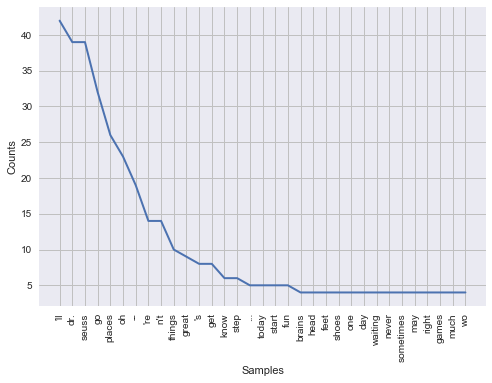

In [45]:
counts.plot(33, cumulative=False)

### NLTK test datasets

nltk.book contains a set of example texts.  These are large.

* Text1: Moby Dick by Herman Melville 1851
* Text2: Sense and Sensibility by Jane Austen 1811
* Text3: The Book of Genesis
* Text4: Inaugural Address Corpus
* Text5: Chat Corpus
* Text6: Monty Python and the Holy Grail
* Text7: Wall Street Journal
* Text8: Personals Corpus
* Text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [46]:
austen = nltk.text.Text(nltk.corpus.gutenberg.words('austen-sense.txt'))
austen.concordance("monstrous", 55, lines=11)

Displaying 11 of 11 matches:
lmer , you shall see a monstrous pretty girl ." He imme
is to marry him . I am monstrous glad of it , for then 
your sister . She is a monstrous lucky girl to get him 
ll like them . Lucy is monstrous pretty , and so good h
" I am sure I shall be monstrous glad of Miss Marianne 
 cheerfulness , " I am monstrous glad to see you -- sor
as it turns out , I am monstrous glad there was never a
y ! for they say he is monstrous fond of her , as well 
t she should ." " I am monstrous glad of it . Good grac
 kind . So then he was monstrous happy , and talked on 
el people . He makes a monstrous deal of money , and th


The corcordance function performs a search for the given token and then also provides the surrounding context.

Jane Austen: Sense and Sensibility
Chapter 19

"Here comes Marianne," cried Sir John. "Now, Palmer, you shall see a monstrous pretty girl."

He immediately went into the passage, opened the front door, and ushered her in himself. Mrs. Jennings asked her, as soon as she appeared, if she had not been to Allenham; and Mrs. Palmer laughed so heartily at the question, as to show she understood it. Mr. Palmer looked up on her entering the room, stared at her some minutes, and then returned to his newspaper. Mrs. Palmer's eye was now caught by the drawings which hung round the room. She got up to examine them.


In [47]:
austen.similar("monstrous")

very so exceedingly heartily a as good great extremely remarkably
sweet vast amazingly


Last update July 8, 2019

The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT).